# Lab 8 Report:
## FINAL PROJECT STRATEGIC PLANNING

### Lab 8 Instruction: https://canvas.uw.edu/courses/1548925/files/92225287?wrap=1

### Team Members:

### Dataset for your project:

#### Feel free to delete or modify pre-written markdown cells below the line

---

## Understanding the Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

emotions_data = pd.read_csv('drive/MyDrive/LABS!/Lab8/emotions.csv')
emotions_data.shape



(2132, 2549)

## Understanding the Task

In [ ]:

# columns -> pos /neg / neutral labels
emotions_data.head()


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


## Developing an initial plan for your project

In [ ]:

features = emotions_data[emotions_data.columns[:-1]]
features # values are kinda clustered, k-clustering for prediction?


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


In [ ]:

# reformat data to feed to model
emotions_dict = {"NEGATIVE":0, "POSITIVE":1, "NEUTRAL":2}
labels = emotions_data["label"]

targets = []
for l in range(len(labels)):
  lbl = labels[l]
  targets.append(emotions_dict[lbl])

targets = np.array(targets, dtype='uint8')



In [ ]:

x_train, y_train, x_test, y_test = train_test_split(features, targets, test_size = 0.2, random_state =42) # probably dont need more combos?

# scale everything. CNNs only take 2d tensors as input
scaler = StandardScaler()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


scaler.fit_transform(x_train)
scaler.fit_transform(y_train)

x_train = x_train[500:]
x_test = x_test[500:]



(1705, 2548)
(427, 2548)
(1705,)
(427,)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))

(1205, 2548)
(427, 2548)
(1205,)
(427,)
<class 'pandas.core.frame.DataFrame'>


In [ ]:

# reshape stuff to 2d dimensions

x_train = np.reshape(x_train, (x_train.shape[0], 182 * 14))
y_train = np.reshape(y_train, (y_train.shape[0], 182 * 14))

x_train = scaler.fit_transform(x_train).reshape((x_train.shape[0], 182, 14))
y_train = scaler.fit_transform(y_train).reshape((y_train.shape[0], 182, 14))


In [ ]:

# can try cnn classifier
class CNNModel(torch.nn.Module):

    def __init__(self):

        super(CNNModel, self).__init__()

        # self.cnn1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size = (5,5), padding = (2,2))
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=2)

        self.cnn2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5,5), stride=1, padding=(2,2))
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2)

        self.fc1 = torch.nn.Linear(4320, 10)

        self.dropout = torch.nn.Dropout(0.2)

    def forward(self, x):

        conv1_out = torch.nn.functional.relu(self.cnn1(x))
        pool1_out = self.maxpool1(conv1_out)

        d = self.dropout(pool1_out)

        conv2_out = torch.nn.functional.relu(self.cnn2(d))
        pool2_out = self.maxpool2(conv2_out)

        fcn_input = pool2_out.view(pool2_out.size(0), -1)

        out = self.fc1(fcn_input)

        return out


In [ ]:


torch.manual_seed(50)
model = CNNModel()

learning_rate = 0.0015
epochs = 50
batchsize = 100


loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)



In [ ]:

train_loss_list = []
validation_accuracy = np.zeros((epochs, ))


In [ ]:

# Reshape to (N, Channels, Height, Width) standard

x_train = np.reshape(x_train, (x_train.shape[0], 1, 182, 14))
y_train = np.reshape(y_train, (y_train.shape[0], 1, 182, 14))
# validation_features = np.reshape(validation_features, (validation_features.shape[0], 1, 182, 14))


In [ ]:

# split off validation stuff
validation_features = x_train[:500]
validation_targets = x_test[:500]

print("Validation features: {}".format(validation_features.shape))
print("Validation targets: {}".format(validation_targets.shape))


Validation features: (500, 1, 182, 14)
Validation targets: (500,)


In [ ]:
# improvement: padding, data augmentation, attention

In [ ]:

import tqdm

train_inputs = torch.from_numpy(x_train).float()
train_targets = torch.from_numpy(x_test).long()

validation_inputs = torch.from_numpy(validation_features).float()
validation_targets = torch.from_numpy(validation_targets).long()

testing_inputs = torch.from_numpy(y_train).float()
testing_targets = torch.from_numpy(y_test).long()

train_batches_features = torch.split(train_inputs, batchsize)
train_batches_targets = torch.split(train_targets, batchsize)

batch_split_num = len(train_batches_features)

# Training Loop ---------------------------------------------------------------------------------------

for epoch in tqdm.trange(epochs):

    for k in range(batch_split_num):

        optimizer.zero_grad()

        train_batch_outputs = model(train_batches_features[k])

        loss = loss_func(train_batch_outputs, train_batches_targets[k])
        train_loss_list.append(loss.item())
        loss.backward()
        optimizer.step()

    # Compute Validation Accuracy ----------------------------------------------------------------------

    with torch.no_grad():

         # print("validation dimensions {}".format(validation_inputs.shape))
        validation_outputs = model(validation_inputs) # here
        correct = (torch.argmax(validation_outputs, dim=1) ==
                   validation_targets).type(torch.FloatTensor)
        validation_accuracy[epoch] = correct.mean()



100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


In [ ]:
print(f"Input shape: {train_batches_features[k].shape}")
print(f"Model input channels: {model.cnn1.in_channels}")

Input shape: torch.Size([5, 1, 182, 14])
Model input channels: 1


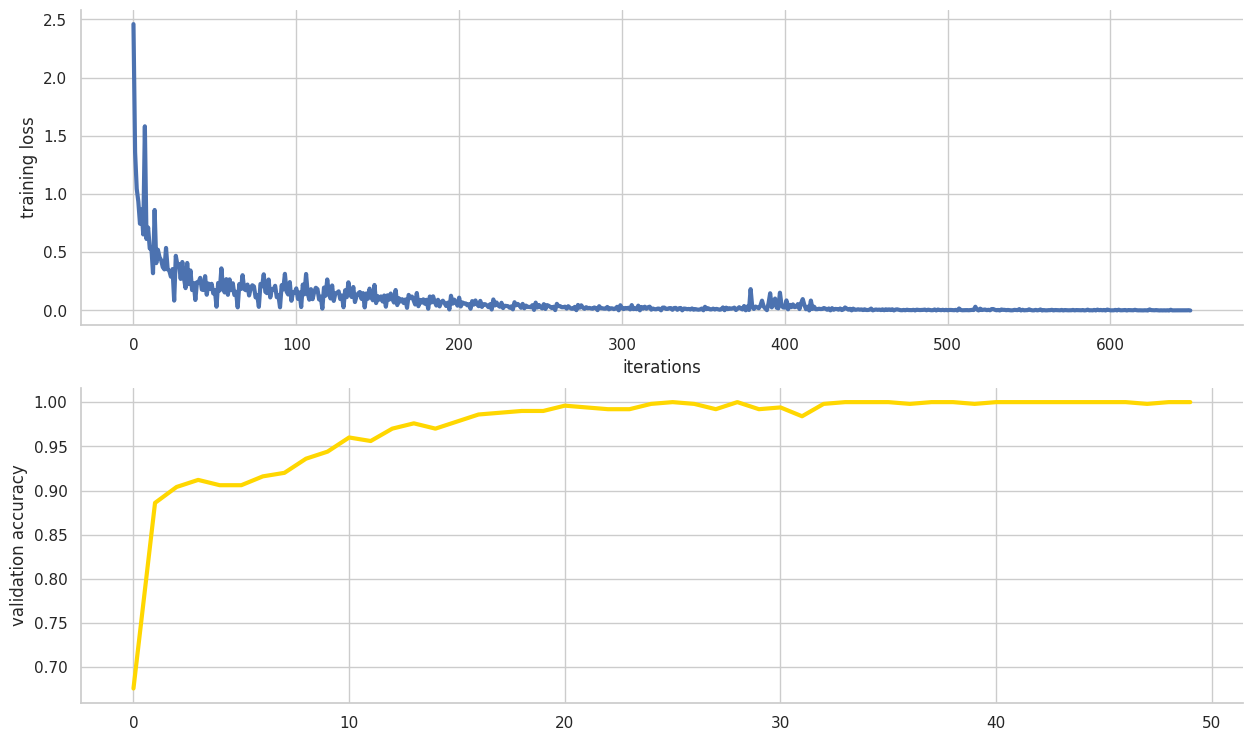

In [ ]:
# Seaborn for prettier plot

import seaborn as sns

sns.set(style = 'whitegrid', font_scale = 1)

# Visualize training loss

plt.figure(figsize = (15, 9))

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3)
plt.ylabel("training loss")
plt.xlabel("iterations")
sns.despine()

plt.subplot(2, 1, 2)
plt.plot(validation_accuracy, linewidth = 3, color = 'gold')
plt.ylabel("validation accuracy")
sns.despine()


In [ ]:

# issue with evaluating accuracy? strangely high... reusing data in testing and training?
# no randomization within the model?
with torch.no_grad():

    y_pred_test = model(testing_inputs)

    correct = (torch.argmax(y_pred_test, dim=1) ==
               testing_targets).type(torch.FloatTensor)

    print("Tesing Accuracy: " + str(correct.mean().numpy()))


print(type(correct))


Tesing Accuracy: 0.97189695
<class 'torch.Tensor'>


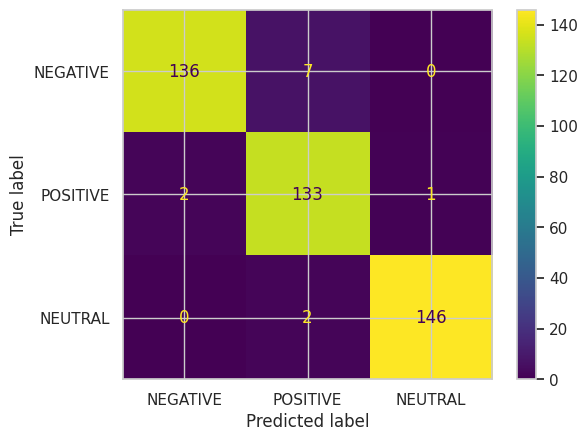

In [ ]:

# confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
matrix = metrics.confusion_matrix(testing_targets, torch.argmax(y_pred_test, dim=1))

# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["NEGATIVE", "POSITIVE", "NEUTRAL"])

# display matrix
cm_display.plot()
plt.show()
